In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Temp_df=pd.read_csv("E:/vishnu viswas/transmeo/temperature (1) (1) (1).csv")
Binsize_df=pd.read_csv("E:/vishnu viswas/transmeo\BinSize (1) (1) (1).csv")

In [3]:
Temp_df.head(5)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
Binsize_df.head(5)


,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


In [5]:
Binsize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  y          18259 non-null  float64
 11  x_group    18258 non-null  object 
 12  y_group    18259 non-null  object 
 13  xy_group   18259 non-null  object 
 14  hash       18259 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.1+ MB


In [6]:
#to find the null values of Dataset Temp_df
Temp_df.isnull().sum()

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [7]:
#to find the null values of Dataset Binsize_df
Binsize_df.isnull().sum()

ID               0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
STATE         5452
NAME             0
GSNFLAG      17332
HCNFLAG      16877
WMOID        12088
x                0
y                0
x_group          1
y_group          0
xy_group         0
hash             0
dtype: int64

In [8]:
# Total null values in percentage for each column in the Bitsize Dataframe
Binsize_df.isnull().sum() / Binsize_df.shape[0] * 100.00

ID            0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
STATE        29.859247
NAME          0.000000
GSNFLAG      94.923052
HCNFLAG      92.431130
WMOID        66.202968
x             0.000000
y             0.000000
x_group       0.005477
y_group       0.000000
xy_group      0.000000
hash          0.000000
dtype: float64

In [10]:
Binsize_df['STATE'].fillna(value='Unknown',inplace =True)

In [21]:
#Dropping Columns which have most Null Values

Binsize_df.drop(columns=['GSNFLAG','HCNFLAG','WMOID'],inplace=True)

In [15]:
 # We have to remove leap days from the month of February
Temp_df['date'] = pd.to_datetime(Temp_df['Date'])
temperature_data = Temp_df[~((Temp_df['date'].dt.month == 2) & (Temp_df['date'].dt.day == 29))]

In [ ]:
# Extract year and day of the year (ignoring the year part)
Temp_df['year'] = Temp_df['date'].dt.year
Temp_df['day_of_year'] = Temp_df['date'].dt.strftime('%m-%d')

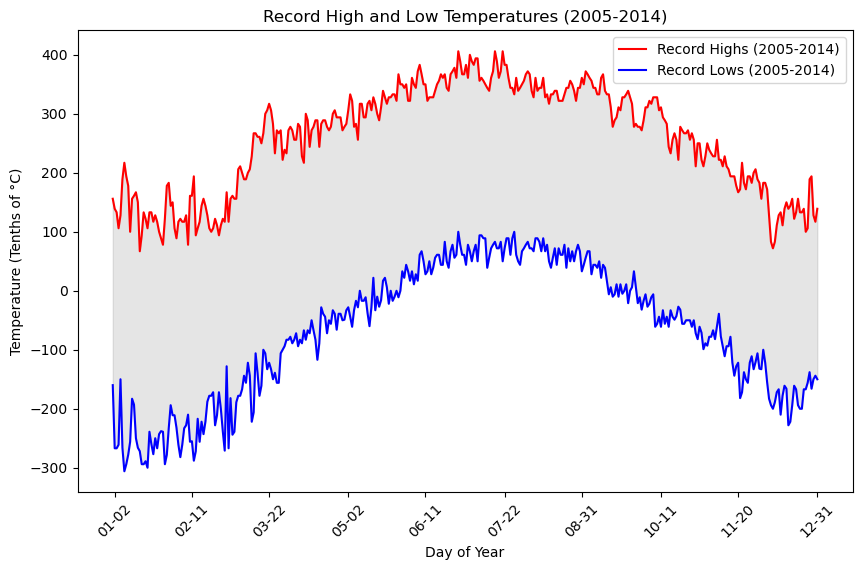

In [36]:
# a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. 
import matplotlib.pyplot as plt
import numpy as np

# Filtering for years 2005-2014
temp_2005_2014 = Temp_df[(Temp_df['year'] >= 2005) & (Temp_df['year'] <= 2014)]

# calculate record highs and lows
record_highs = temp_2005_2014[temp_2005_2014['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = temp_2005_2014[temp_2005_2014['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()

# Plot the data
days_of_year = np.arange(1, 366) 

plt.figure(figsize=(10, 6))
plt.xticks(np.linspace(1, 365, 10, dtype=int))

plt.plot(record_highs.index, record_highs.values, color='red', label='Record Highs (2005-2014)')
plt.plot(record_lows.index, record_lows.values, color='blue', label='Record Lows (2005-2014)')

plt.fill_between(record_highs.index, record_lows.values, record_highs.values, color='gray', alpha=0.2)

plt.title('Record High and Low Temperatures (2005-2014)')
plt.xlabel('Day of Year')
plt.xticks(rotation=45)
plt.ylabel('Temperature (Tenths of °C)')
plt.legend()
plt.show()


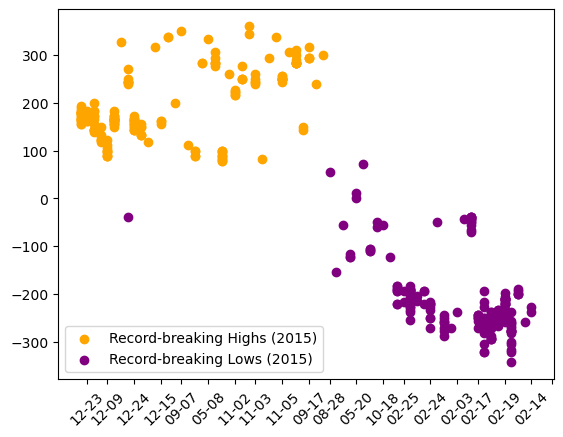

In [39]:
#  a scatter plot of the 2015 data for highs and lows values was broken in 2015 between 10 years of records (2005-2014) r 
# Filter for 2015 data
temp_2015 = Temp_df[Temp_df['year'] == 2015]

# Find points where 2015 broke records
highs_2015 = temp_2015[temp_2015['Element'] == 'TMAX']
lows_2015 = temp_2015[temp_2015['Element'] == 'TMIN']

broken_highs = highs_2015[highs_2015.apply(lambda row: row['Data_Value'] > record_highs.get(row['day_of_year'], -9999), axis=1)]
broken_lows = lows_2015[lows_2015.apply(lambda row: row['Data_Value'] < record_lows.get(row['day_of_year'], 9999), axis=1)]

# Overlay scatter plot 
plt.xticks(np.linspace(1, 365, 100, dtype=int))
plt.xticks(rotation=45)
plt.scatter(broken_highs['day_of_year'], broken_highs['Data_Value'], color='orange', label='Record-breaking Highs (2015)')
plt.scatter(broken_lows['day_of_year'], broken_lows['Data_Value'], color='purple', label='Record-breaking Lows (2015)')
plt.legend()
plt.show()


In [44]:
# 5. Visualisation of datas near to Ann Arbor, Michigan, United States
import plotly.express as px
import pandas as pd
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.7430
# Plot the  locations on a map using Plotly Express
fig = px.scatter_mapbox(Binsize_df,lat="LATITUDE",lon="LONGITUDE", hover_name="NAME",
    zoom=10, center={"lat": 42.2808, "lon": -83.7430},height=600,                 
)

# Use an open-source mapbox style
fig.update_layout(mapbox_style="open-street-map")

# Add a title
fig.update_layout(title_text="Station Locations near Ann Arbor, Michigan", title_x=0.5)

# Display the map
fig.show()



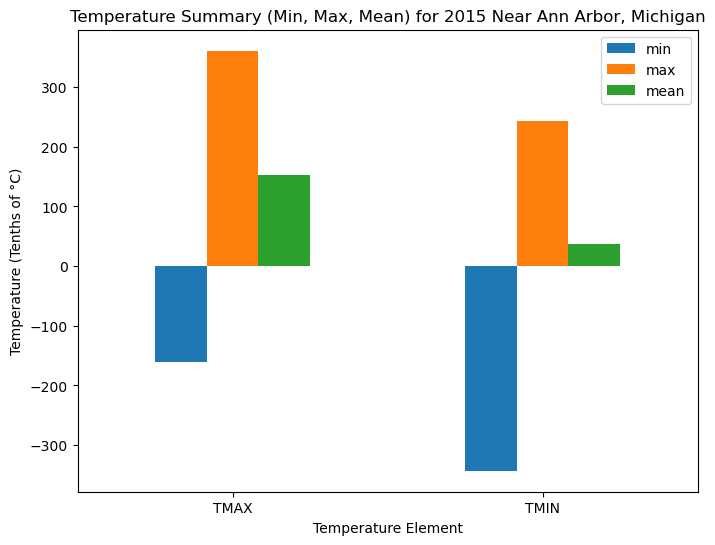

In [30]:
# Temperature Summary near Ann Arbor, Michigan, United States (Year 2015)
summary_2015 = temp_2015.groupby('Element')['Data_Value'].agg(['min', 'max', 'mean'])

index = ['TMAX', 'TMIN']  # Temperature elements


summary_2015 = pd.DataFrame(summary_2015, index=index)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting min, max, and mean for each element
summary_2015.plot(kind='bar', ax=ax)
ax.set_xlabel('Temperature Element')
ax.set_ylabel('Temperature (Tenths of °C)')
ax.set_title('Temperature Summary (Min, Max, Mean) for 2015 Near Ann Arbor, Michigan')
plt.xticks(rotation=0)
plt.show()


